## Importing libraries and reading data (to show the results of the analysis, we use the learning data on kaggle as a entire data set)

In [1]:
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn tools
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SMOTENC
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif,chi2
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

df = pd.read_csv("purchase600-100cls-15k.lrn.csv").drop('ID', axis=1)#.sample(frac=1).reset_index()
#df_test = pd.read_csv("purchase600-100cls-15k.tes.csv").drop('ID', axis=1)#.sample(frac=1).reset_index()

## Dividing training set and test set

In [2]:
X = df.drop('class', axis=1) # non target
y = df['class'] # target

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)

## Performing a Grid Search (with cross-validation) for parameter tuning of Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

a = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
b = ['balanced', 'imbalanced']
param_grid = dict(C=a, class_weight=b)

#clf = OneVsOneClassifier(LogisticRegression(verbose = True)).fit(X_train, y_train) 

clf = LogisticRegression(multi_class='multinomial')

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_contour = grid_results.groupby(['C','class_weight']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['Coefficient of regularization', 'Class weight', 'Accuracy']
grid_pivot = grid_reset.pivot('Coefficient of regularization', 'Class weight')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

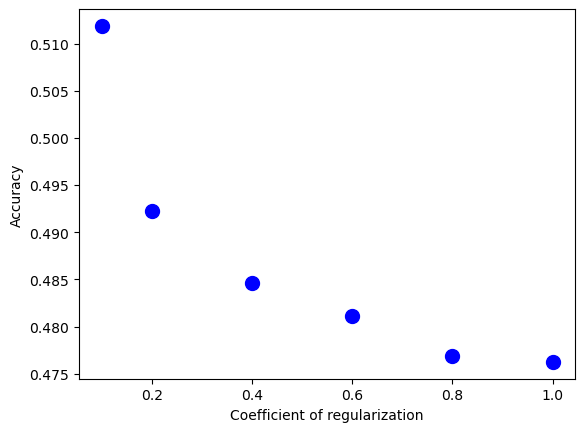

In [5]:
fig = plt.gcf()

plt.plot(grid_reset['Coefficient of regularization'], grid_reset['Accuracy'], linestyle='dashed', color='Blue',marker='o', markersize=10)
plt.xlabel('Coefficient of regularization')
plt.ylabel('Accuracy')

plt.show()
plt.draw()
fig.savefig('TUNEpurchaseLR.png', dpi=600)

## Logistic Regression and hold-out evaluation with best hyperparameters

In [17]:
#LR = LogisticRegression()
LR = OneVsOneClassifier(LogisticRegression(verbose = True))

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

#Evaluation
print(classification_report(y_test, y_pred, zero_division = 0))
print("score: ", LR.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.41      0.35      0.38        20
           1       0.92      0.75      0.83        16
           2       0.80      0.36      0.50        11
           3       0.50      0.77      0.61        44
           4       0.62      0.91      0.74        11
           5       0.44      0.58      0.50        19
           6       1.00      0.79      0.88        19
           7       0.50      0.54      0.52        24
           8       0.74      0.85      0.79        20
           9       0.42      0.44      0.43        18
          10       0.61      0.55      0.58        20
          11       0.41      0.50      0.45        26
          12       0.53      0.44      0.48        18
          13       0.74      0.61      0.67        28
          14       0.52      0.47      0.49        30
          15       0.58      0.58      0.58        26
          16       0.55      0.62      0.58        39
          17       0.24    

/home/cristiano/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Performing a Grid Search (with cross-validation) for parameter tuning of k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

a = ['manhattan', 'euclidean', 'cosine']
b = [3,5,7,9,11,13,15,17]
param_grid = dict(metric=a, n_neighbors=b)

clf = KNeighborsClassifier()

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_contour = grid_results.groupby(['metric','n_neighbors']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['metric','n_neighbors', 'Accuracy']
grid_pivot = grid_reset.pivot('metric','n_neighbors')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

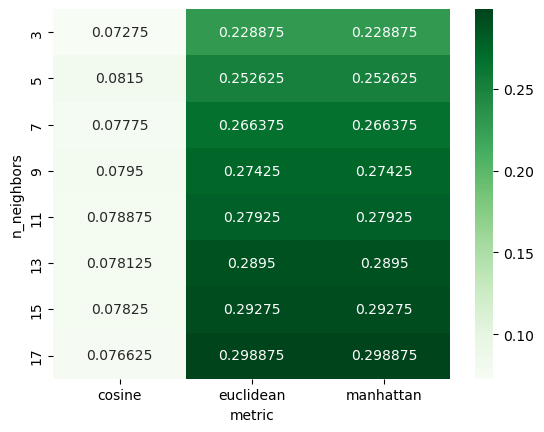

In [21]:
fig = plt.gcf()

sns.heatmap(grid_pivot['Accuracy'].transpose(),annot=True,cmap='Greens', fmt='g')

plt.show()
plt.draw()

fig.savefig('TUNEpurchasekNN.png', dpi=100)

## k-NN and hold-out evaluation with best hyperparameters

In [31]:
#kNN = KNeighborsClassifier(n_neighbors=40)
kNN = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=20)).fit(X_train, y_train)
#kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
#Evaluation
print(classification_report(y_test, y_pred, zero_division = 0))
print("score: ", kNN.score(X_test, y_test))
M = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.25      0.05      0.08        20
           1       0.68      0.81      0.74        16
           2       0.71      0.91      0.80        11
           3       0.50      0.86      0.63        44
           4       0.41      0.64      0.50        11
           5       0.65      0.68      0.67        19
           6       0.25      1.00      0.40        19
           7       0.54      0.62      0.58        24
           8       0.19      0.45      0.26        20
           9       0.40      0.11      0.17        18
          10       1.00      0.25      0.40        20
          11       0.44      0.73      0.55        26
          12       0.20      0.17      0.18        18
          13       0.80      0.29      0.42        28
          14       0.50      0.30      0.37        30
          15       0.82      0.69      0.75        26
          16       0.36      0.82      0.50        39
          17       0.67    